In [1]:
import pandas as pd
#from dask.distributed import Client, LocalCluster
#import dask.dataframe as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import json
from pathlib import Path
from operator import itemgetter
import os

from sklearn.feature_extraction.text import CountVectorizer, BaseEstimator, ENGLISH_STOP_WORDS, TfidfTransformer

In [2]:
def json_reader(absolute_parent_path):
    total_data = []
    file_list = (str(i) for i in Path('/data/capstone_data/messages/inbox/').glob('*/*.json'))
    for file in file_list:
        with open(file) as json_data:
            try:
                yield json.load(json_data)
                #total_data.append(data_raw)
                
            except:
                pass
    return total_data

In [3]:
inbox_data = json_reader('/data/capstone_data/messages/inbox/')

In [4]:
archive_data = json_reader('/data/capstone_data/messages/archived_threads/')

In [5]:
all_data = [inbox_data, archive_data]

In [6]:
def unpack_list(dict_item):
    content_list = []
    for entry in dict_item:
        for i in range(len(entry['messages'])):
            try:
                content = pd.DataFrame([i for i in entry['messages']][i])
                content_list.append(content)
            except:
                pass
    return pd.concat(content_list)

In [ ]:
#all_comments = [unpack_list(i) for i in all_data]

In [7]:
#pd.concat(all_comments).to_pickle('fb_chat_history_sept_2009_oct_2020_test.pkl')
#all_comments.to_csv('fb_chat_history_sept_2009_oct_2020_test.csv')

In [8]:
#all_comments = pd.read_csv('fb_chat_history_sept_2009_oct_2020.csv')
all_comments = pd.read_pickle('fb_chat_history_sept_2009_oct_2020_test.pkl')

In [9]:
all_comments['sender_name'].value_counts()

Vivian Nguyen             89998
Zee Ng                    53112
Jane Yuan                 44814
Chieko K. Kagiyama        42096
Aly P. Lee                23786
                          ...  
Marissa Dalton                2
Linh Cx                       2
Ai Nguyen                     2
David Trinh                   2
Jesus Alejandro Zavala        2
Name: sender_name, Length: 1174, dtype: int64

In [10]:
len(all_comments)

576678

In [11]:
all_comments.tail()

,sender_name,timestamp_ms,audio_files,reactions,type,videos,content,photos,share,sticker,gifs,ip,users,files,payment_info,call_duration
0,Joylene Ling,1586985250785,NaN,NaN,Generic,NaN,NaN,NaN,NaN,NaN,{'uri': 'messages/inbox/joyleneling_rl025p0whg...,NaN,NaN,NaN,NaN,NaN
0,Vivian Nguyen,1586985131592,NaN,NaN,Generic,NaN,NaN,{'uri': 'messages/inbox/joyleneling_rl025p0whg...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Vivian Nguyen,1586031878945,NaN,"{'reaction': 'â¤', 'actor': 'Autumn Donaldson'}",Generic,NaN,NaN,{'uri': 'messages/inbox/autumndonaldson_ktqki8...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uri,Vivian Nguyen,1567709076587,NaN,NaN,Generic,NaN,NaN,NaN,NaN,messages/stickers_used/39178562_15051976162936...,NaN,NaN,NaN,NaN,NaN,NaN
0,Stephanie Vandiver,1567700836439,NaN,"{'reaction': 'â¤', 'actor': 'Vivian Nguyen'}",Generic,NaN,Yes Iâm completely fine with that,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
all_comments['sender_name'].value_counts().tail(20)

Julian Wissman                2
Erika CastaÃ±eda              2
Lilian Chin                   2
Juan Miguel Lorenzo Pammit    2
John A. Swilley               2
Cathy Ky                      2
Caleb Holleman                2
Trinh Le                      2
Lee K Pa                      2
Leena Nguyen                  2
Jesus Solorio                 2
Cypress Kuhnel                2
Fiona Hare                    2
Jennifer Jang                 2
Sara Edwards                  2
Marissa Dalton                2
Linh Cx                       2
Ai Nguyen                     2
David Trinh                   2
Jesus Alejandro Zavala        2
Name: sender_name, dtype: int64

<AxesSubplot:>

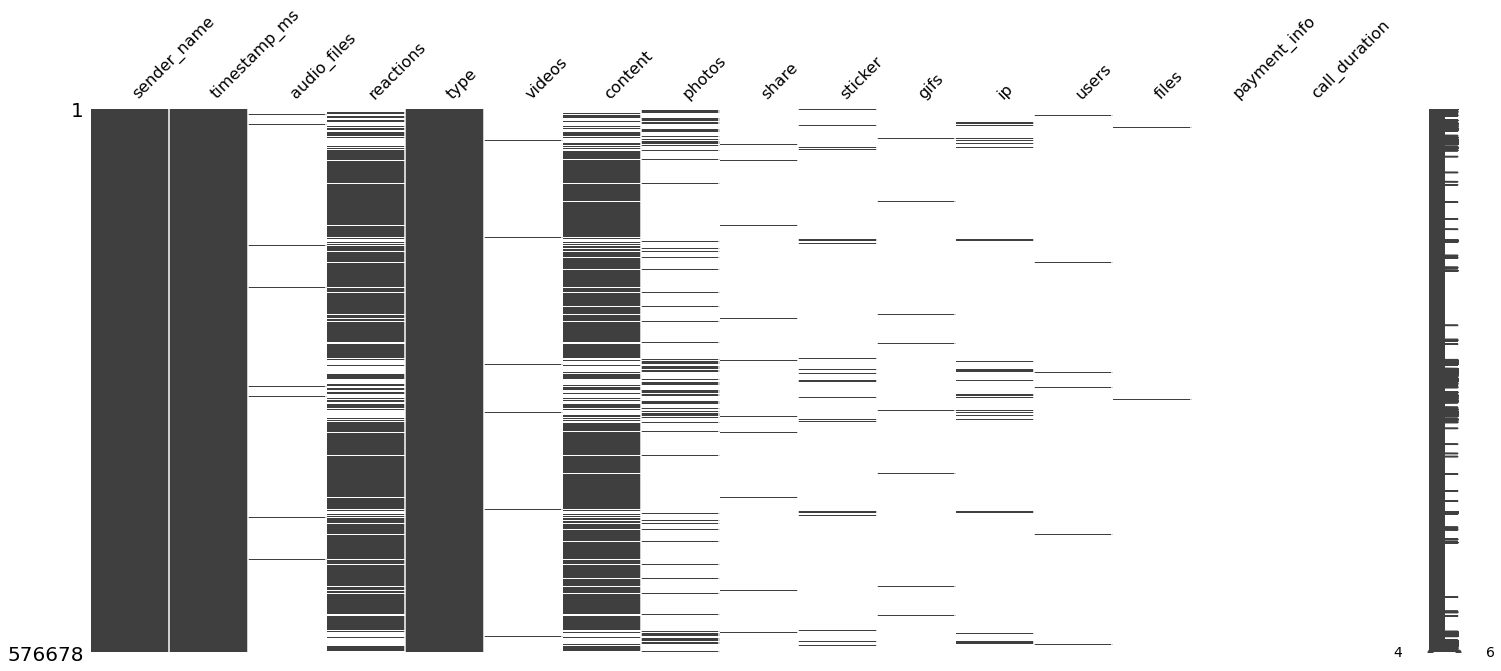

In [13]:
msno.matrix(all_comments)

In [14]:
all_comments['timestamp_ms'].min(), all_comments['timestamp_ms'].max()

(1255746142000, 1601328658314)

In [15]:
all_messages_no_context = all_comments['content'].dropna()

In [16]:
all_messages_no_context

0       that makes me happy to hear!\nwhat is this boo...
0       right now, i am spending time with Brooke, a l...
0            i have a code boot camp starting on the 24th
0                                     her hair is amazing
link        All i have is that one I put on instagram.com
                              ...                        
0       Luckily where I work, I don't have coworkers t...
0                         lemme go and replan my strategy
0                         ahahabha i cant argue back huh?
0       I don't really care where they go, but that I ...
0                     Yes Iâm completely fine with that
Name: content, Length: 451664, dtype: object

In [17]:
cv = CountVectorizer()
matrix = cv.fit_transform(all_messages_no_context)
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])
df_words_no_stop = pd.DataFrame(freqs, columns=['word','count'])
top_30_no_stop = df_words_no_stop.sort_values(by='count', ascending=False).head(30)

In [18]:
my_stop_words = ['to', 'and', 'the', 'you', 'it', 'my', 'of', 'in', 'is', 'that', 'for', 'me', 'but', 'this', 'so', 'like', 'was', 'with', 'on', 'just',
             'be', 'have', 'not', 'we', 'if', 'she','are', 'can', 'up', 'at', 'her', 'out', 'as', 'your', 'they', 'about', 'do', 'or', 'all', 'when', 
             'what', 'one', 'also', 'get', 'know', 'from', 'an', 'all', 'how', 'now', 'who', 'then', 'too', 'more', 'there', 'because', 'really', 
             'want', 'them', 'will', 'would', 'am', 'been', 'people', 'think', 'got', 'feel', 'going', 'iâ', 've', 'itâ', 'donâ', 'time', 'youâ', 'll',
                'don', 'https', 'll', 'thatâ', 'im']

In [19]:
stop_words = ENGLISH_STOP_WORDS.union(my_stop_words)

In [20]:
cv = CountVectorizer(stop_words=stop_words)

In [21]:
matrix = cv.fit_transform(all_messages_no_context)
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])
df_words = pd.DataFrame(freqs, columns=['word','count'])

In [22]:
top_30 = df_words.sort_values(by='count', ascending=False).head(30)

In [23]:
top_30.head()

,word,count
17748,good,13680
24218,lol,12862
24405,love,12468
18113,group,10788
34311,say,10350


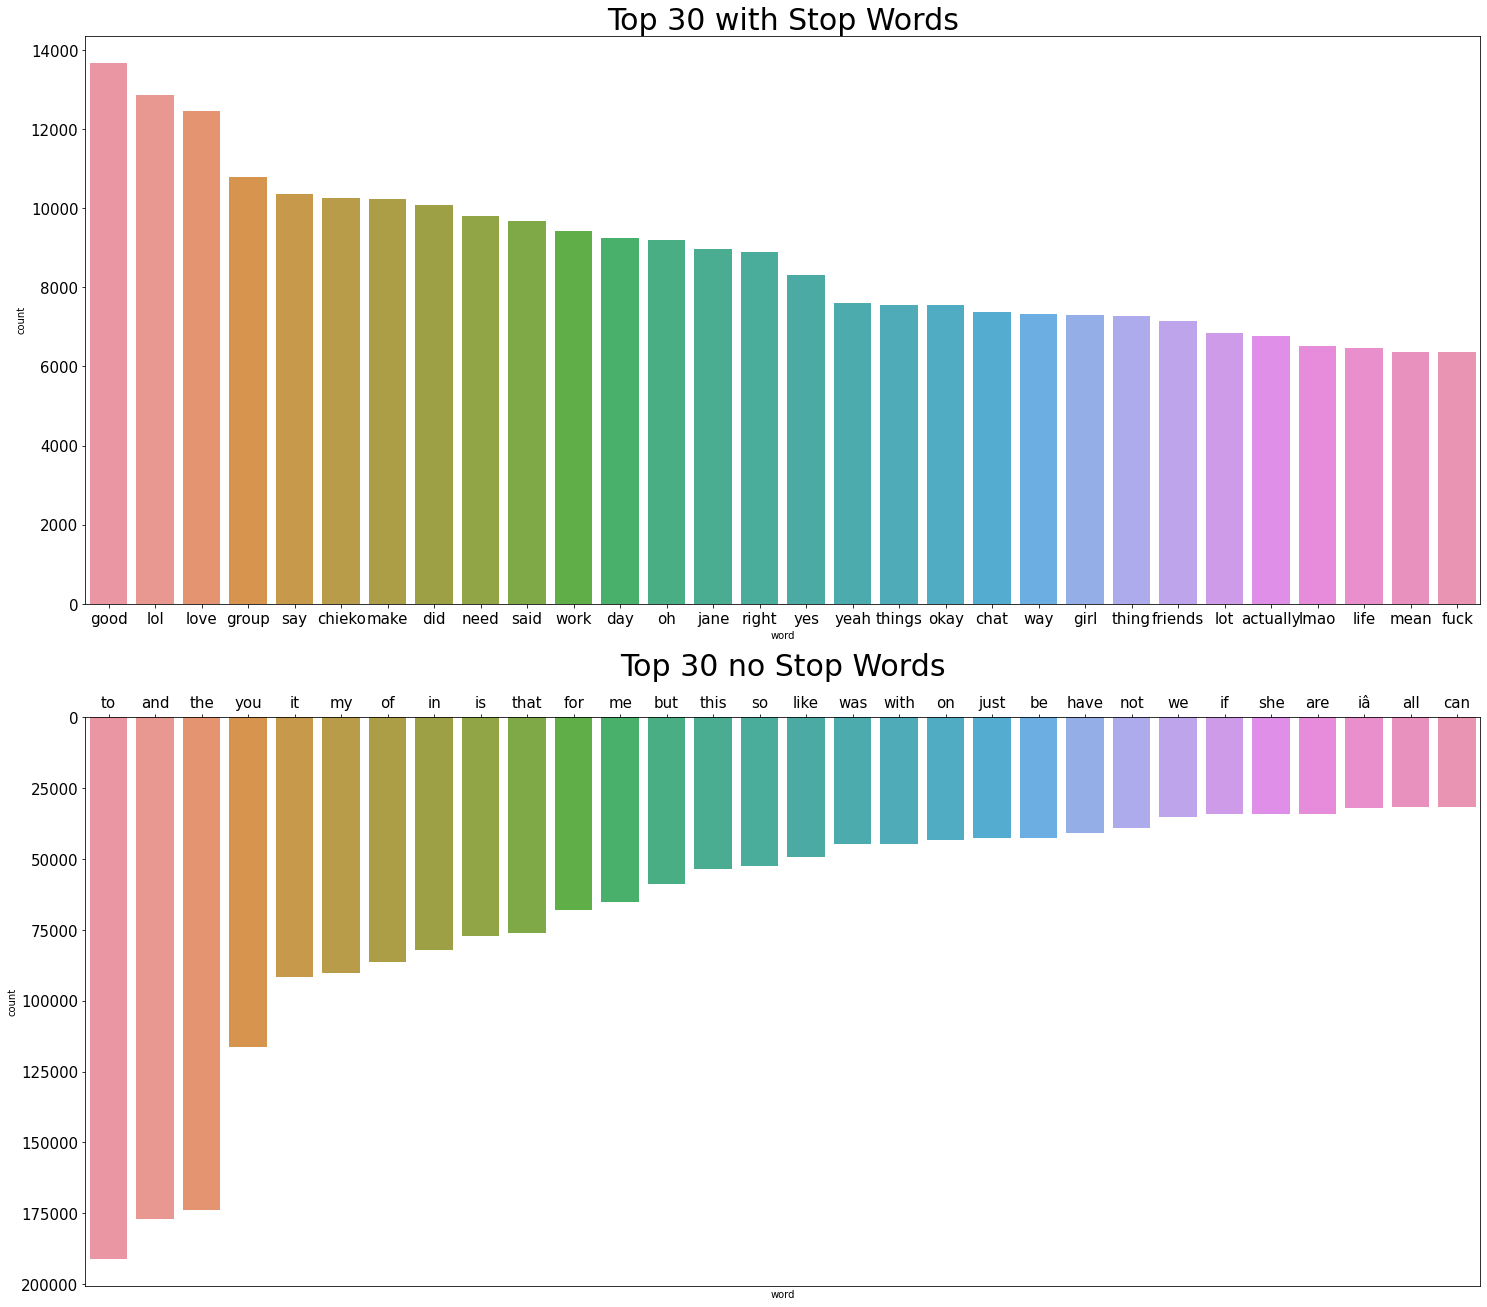

In [24]:
plt.figure(figsize=(25,23), facecolor='white')
plt.subplot(2,1,1)
sns.barplot(x=top_30['word'], y=top_30['count'])
plt.title('Top 30 with Stop Words', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('top_30_w_stop.png')
plt.subplot(2,1,2)
sns.barplot(x=top_30_no_stop['word'], y=top_30_no_stop['count'])
plt.gca().invert_yaxis()
plt.title('Top 30 no Stop Words', fontsize=30, pad=20)
plt.gca().xaxis.tick_top()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.savefig('top30_with_without.png')

In [25]:
matrix

<451664x44576 sparse matrix of type '<class 'numpy.int64'>'
	with 2862422 stored elements in Compressed Sparse Row format>

In [26]:
ttran = TfidfTransformer(use_idf=True, smooth_idf=True)
df_tfdif_all = ttran.fit_transform(matrix)

In [28]:
# top_words to dataframe sorted by highest occurance
most_freq_tf = pd.DataFrame(sorted(df_tfdif_all, key = lambda x: x[1], reverse = True))

IndexError: row index (1) out of range

In [ ]:
most_freq_tf